In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris

In [3]:
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)

In [4]:
df.isnull().sum()

,0
sepal length (cm),0
sepal width (cm),0
petal length (cm),0
petal width (cm),0
species,0


In [5]:
print(df.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

  species  
0  setosa  
1  setosa  
2  setosa  
3  setosa  
4  setosa  


In [6]:
q1 = df['sepal length (cm)'].quantile(0.25)
q2 = df['sepal length (cm)'].quantile(0.50) # Median
q3 = df['sepal length (cm)'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

print(f"IQR: {iqr}")
print(f"Lower Bound: {lower_bound}")
print(f"Upper Bound: {upper_bound}")
print(f"Q1 (25th percentile): {q1}")
print(f"Q2 (Median - 50th percentile): {q2}")
print(f"Q3 (75th percentile): {q3}")

IQR: 1.3000000000000007
Lower Bound: 3.1499999999999986
Upper Bound: 8.350000000000001
Q1 (25th percentile): 5.1
Q2 (Median - 50th percentile): 5.8
Q3 (75th percentile): 6.4


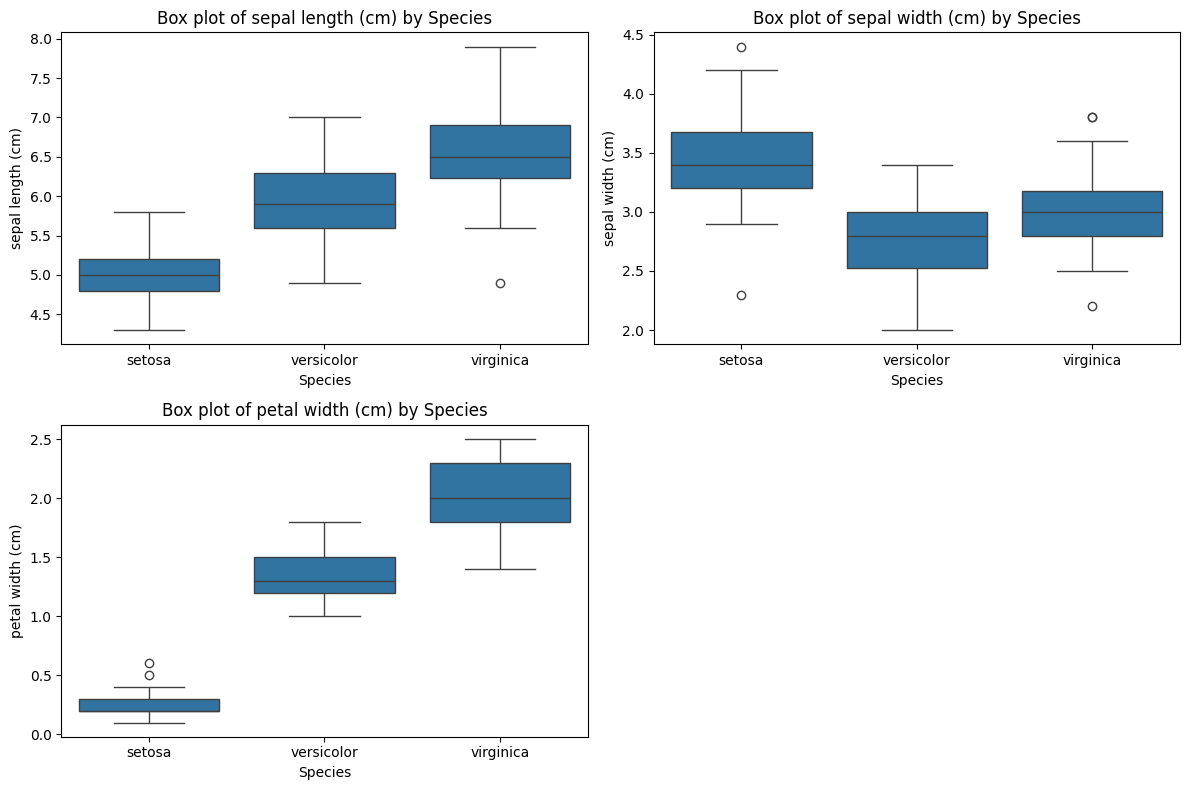

In [7]:
numerical_cols = ['sepal length (cm)', 'sepal width (cm)', 'petal width (cm)']

plt.figure(figsize=(12, 8))
for i, col in enumerate(numerical_cols):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(x='species', y=col, data=df)
    plt.title(f'Box plot of {col} by Species')
    plt.xlabel('Species')
    plt.ylabel(col)
plt.tight_layout()
plt.show()

In [8]:
from sklearn.datasets import load_iris
iris_original = load_iris()
df_original = pd.DataFrame(iris_original.data, columns=iris_original.feature_names)
df_original['species'] = pd.Categorical.from_codes(iris_original.target, iris_original.target_names)

numerical_cols = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
species_names = df_original['species'].unique()

print("Checking for outliers in each column for each species (before introducing nulls):")
print("-" * 50)

for col in numerical_cols:
    print(f"Checking '{col}':")
    for species in species_names:
        species_df = df_original[df_original['species'] == species].copy() # Use .copy() to avoid SettingWithCopyWarning

        if not species_df.empty:
            q1 = species_df[col].quantile(0.25)
            q3 = species_df[col].quantile(0.75)
            iqr = q3 - q1
            lower_bound = q1 - 1.5 * iqr
            upper_bound = q3 + 1.5 * iqr

            outliers = species_df[(species_df[col] < lower_bound) | (species_df[col] > upper_bound)]

            print(f"  Potential outliers in '{col}' for species '{species}':")
            if outliers.empty:
                print("    No outliers found.")
            else:
                display(outliers)
        else:
             print(f"  No data for species '{species}' in column '{col}'.") # Should not happen with this dataset

    print("-" * 30)

Checking for outliers in each column for each species (before introducing nulls):
--------------------------------------------------
Checking 'sepal length (cm)':
  Potential outliers in 'sepal length (cm)' for species 'setosa':
    No outliers found.
  Potential outliers in 'sepal length (cm)' for species 'versicolor':
    No outliers found.
  Potential outliers in 'sepal length (cm)' for species 'virginica':


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
106,4.9,2.5,4.5,1.7,virginica


------------------------------
Checking 'sepal width (cm)':
  Potential outliers in 'sepal width (cm)' for species 'setosa':


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
15,5.7,4.4,1.5,0.4,setosa
41,4.5,2.3,1.3,0.3,setosa


  Potential outliers in 'sepal width (cm)' for species 'versicolor':
    No outliers found.
  Potential outliers in 'sepal width (cm)' for species 'virginica':


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
117,7.7,3.8,6.7,2.2,virginica
119,6.0,2.2,5.0,1.5,virginica
131,7.9,3.8,6.4,2.0,virginica


------------------------------
Checking 'petal length (cm)':
  Potential outliers in 'petal length (cm)' for species 'setosa':


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
13,4.3,3.0,1.1,0.1,setosa
22,4.6,3.6,1.0,0.2,setosa
24,4.8,3.4,1.9,0.2,setosa
44,5.1,3.8,1.9,0.4,setosa


  Potential outliers in 'petal length (cm)' for species 'versicolor':


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
98,5.1,2.5,3.0,1.1,versicolor


  Potential outliers in 'petal length (cm)' for species 'virginica':
    No outliers found.
------------------------------
Checking 'petal width (cm)':
  Potential outliers in 'petal width (cm)' for species 'setosa':


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
23,5.1,3.3,1.7,0.5,setosa
43,5.0,3.5,1.6,0.6,setosa


  Potential outliers in 'petal width (cm)' for species 'versicolor':
    No outliers found.
  Potential outliers in 'petal width (cm)' for species 'virginica':
    No outliers found.
------------------------------


In [9]:
tax_values = [0, 100, 120, 130, 150, 200, 250, 400, 420, 450]
tax_df = pd.DataFrame(tax_values, columns=['tax'])
display(tax_df)

,tax
0,0
1,100
2,120
3,130
4,150
5,200
6,250
7,400
8,420
9,450


In [10]:
q1_tax = tax_df['tax'].quantile(0.25)
q2_tax = tax_df['tax'].quantile(0.50) # Median
q3_tax = tax_df['tax'].quantile(0.75)
iqr_tax = q3_tax - q1_tax
lower_bound_tax = q1_tax - 1.5 * iqr_tax
upper_bound_tax = q3_tax + 1.5 * iqr_tax

print(f"Q1 (25th percentile) for Tax: {q1_tax}")
print(f"Q2 (Median - 50th percentile) for Tax: {q2_tax}")
print(f"Q3 (75th percentile) for Tax: {q3_tax}")
print(f"IQR for Tax: {iqr_tax}")
print(f"Lower Bound for Tax: {lower_bound_tax}")
print(f"Upper Bound for Tax: {upper_bound_tax}")

Q1 (25th percentile) for Tax: 122.5
Q2 (Median - 50th percentile) for Tax: 175.0
Q3 (75th percentile) for Tax: 362.5
IQR for Tax: 240.0
Lower Bound for Tax: -237.5
Upper Bound for Tax: 722.5


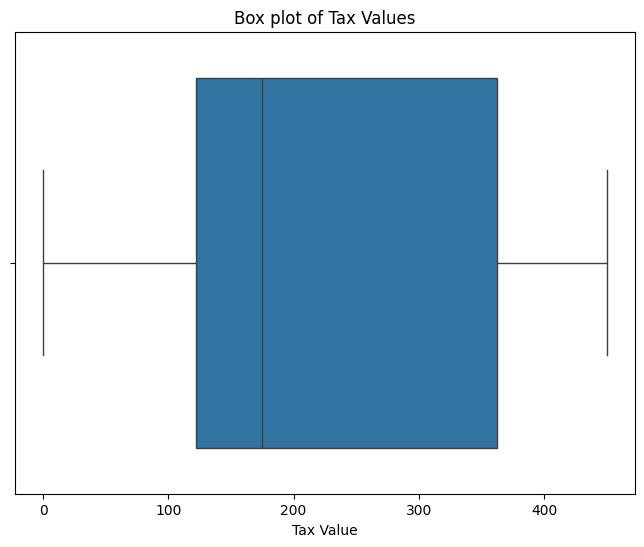

In [11]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=tax_df['tax'])
plt.title('Box plot of Tax Values')
plt.xlabel('Tax Value')
plt.show()

In [12]:
q1_tax = tax_df['tax'].quantile(0.25)
q3_tax = tax_df['tax'].quantile(0.75)
iqr_tax = q3_tax - q1_tax
lower_bound_tax = q1_tax - 1.5 * iqr_tax
upper_bound_tax = q3_tax + 1.5 * iqr_tax

outliers_tax = tax_df[(tax_df['tax'] < lower_bound_tax) | (tax_df['tax'] > upper_bound_tax)]

print("Checking for potential outliers in 'tax':")
if outliers_tax.empty:
    print("  No outliers found.")
else:
    display(outliers_tax)
print("-" * 30)

Checking for potential outliers in 'tax':
  No outliers found.
------------------------------


In [13]:
df['petal length (cm)'] = np.nan

In [14]:
df.isnull().sum()

,0
sepal length (cm),0
sepal width (cm),0
petal length (cm),150
petal width (cm),0
species,0


In [15]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,NaN,0.2,setosa
1,4.9,3.0,NaN,0.2,setosa
2,4.7,3.2,NaN,0.2,setosa
3,4.6,3.1,NaN,0.2,setosa
4,5.0,3.6,NaN,0.2,setosa


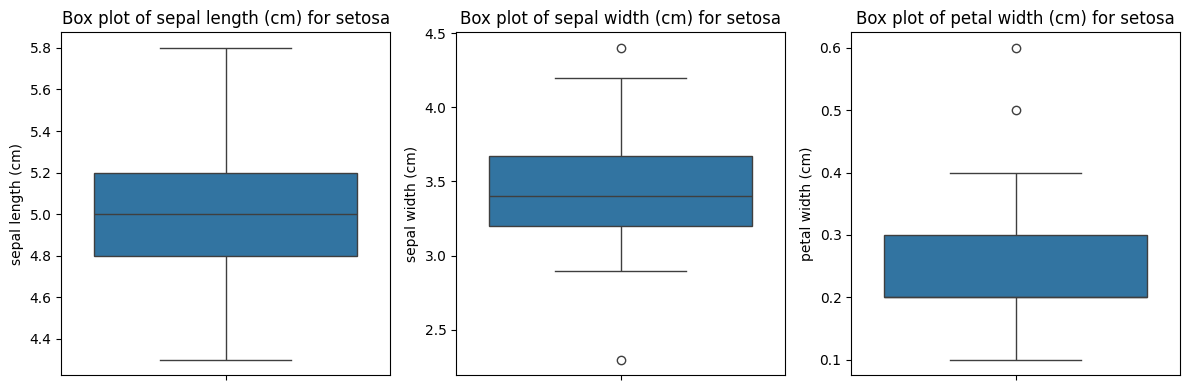

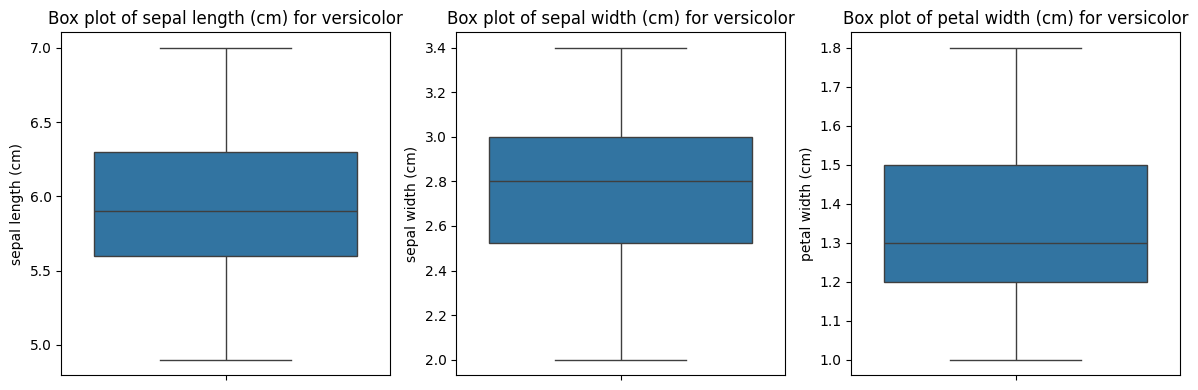

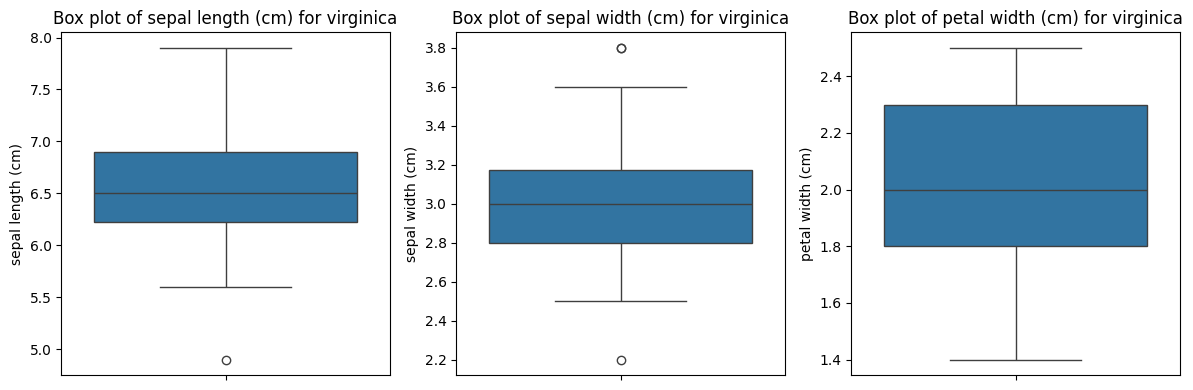

In [16]:
numerical_cols = ['sepal length (cm)', 'sepal width (cm)', 'petal width (cm)']
species_names = df['species'].unique()

for species in species_names:
    species_df = df[df['species'] == species]
    plt.figure(figsize=(12, 4))
    for i, col in enumerate(numerical_cols):
        plt.subplot(1, 3, i + 1)
        sns.boxplot(y=col, data=species_df)
        plt.title(f'Box plot of {col} for {species}')
        plt.ylabel(col)
    plt.tight_layout()
    plt.show()

In [17]:
numerical_cols_for_calculations = ['sepal length (cm)', 'sepal width (cm)', 'petal width (cm)']

for col in numerical_cols_for_calculations:
    q1 = df[col].quantile(0.25)
    q2 = df[col].quantile(0.50)  # Median
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    print(f"Calculations for '{col}':")
    print(f"  Q1 (25th percentile): {q1}")
    print(f"  Q2 (Median - 50th percentile): {q2}")
    print(f"  Q3 (75th percentile): {q3}")
    print(f"  IQR: {iqr}")
    print(f"  Lower Bound: {lower_bound}")
    print(f"  Upper Bound: {upper_bound}")
    print("-" * 30)

Calculations for 'sepal length (cm)':
  Q1 (25th percentile): 5.1
  Q2 (Median - 50th percentile): 5.8
  Q3 (75th percentile): 6.4
  IQR: 1.3000000000000007
  Lower Bound: 3.1499999999999986
  Upper Bound: 8.350000000000001
------------------------------
Calculations for 'sepal width (cm)':
  Q1 (25th percentile): 2.8
  Q2 (Median - 50th percentile): 3.0
  Q3 (75th percentile): 3.3
  IQR: 0.5
  Lower Bound: 2.05
  Upper Bound: 4.05
------------------------------
Calculations for 'petal width (cm)':
  Q1 (25th percentile): 0.3
  Q2 (Median - 50th percentile): 1.3
  Q3 (75th percentile): 1.8
  IQR: 1.5
  Lower Bound: -1.95
  Upper Bound: 4.05
------------------------------


In [18]:
numerical_cols_for_calculations = ['sepal length (cm)', 'sepal width (cm)', 'petal width (cm)']
species_names = df['species'].unique()

print("Checking for potential outliers in each column for each species:")
print("-" * 50)

for col in numerical_cols_for_calculations:
    print(f"Checking '{col}':")
    for species in species_names:
        species_df = df[df['species'] == species].copy() # Use .copy() to avoid SettingWithCopyWarning

        if not species_df.empty:
            q1 = species_df[col].quantile(0.25)
            q3 = species_df[col].quantile(0.75)
            iqr = q3 - q1
            lower_bound = q1 - 1.5 * iqr
            upper_bound = q3 + 1.5 * iqr

            outliers = species_df[(species_df[col] < lower_bound) | (species_df[col] > upper_bound)]

            print(f"  Potential outliers in '{col}' for species '{species}':")
            if outliers.empty:
                print("    No outliers found.")
            else:
                display(outliers)
        else:
             print(f"  No data for species '{species}' in column '{col}'.") # Should not happen with this dataset

    print("-" * 30)

Checking for potential outliers in each column for each species:
--------------------------------------------------
Checking 'sepal length (cm)':
  Potential outliers in 'sepal length (cm)' for species 'setosa':
    No outliers found.
  Potential outliers in 'sepal length (cm)' for species 'versicolor':
    No outliers found.
  Potential outliers in 'sepal length (cm)' for species 'virginica':


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
106,4.9,2.5,NaN,1.7,virginica


------------------------------
Checking 'sepal width (cm)':
  Potential outliers in 'sepal width (cm)' for species 'setosa':


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
15,5.7,4.4,NaN,0.4,setosa
41,4.5,2.3,NaN,0.3,setosa


  Potential outliers in 'sepal width (cm)' for species 'versicolor':
    No outliers found.
  Potential outliers in 'sepal width (cm)' for species 'virginica':


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
117,7.7,3.8,NaN,2.2,virginica
119,6.0,2.2,NaN,1.5,virginica
131,7.9,3.8,NaN,2.0,virginica


------------------------------
Checking 'petal width (cm)':
  Potential outliers in 'petal width (cm)' for species 'setosa':


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
23,5.1,3.3,NaN,0.5,setosa
43,5.0,3.5,NaN,0.6,setosa


  Potential outliers in 'petal width (cm)' for species 'versicolor':
    No outliers found.
  Potential outliers in 'petal width (cm)' for species 'virginica':
    No outliers found.
------------------------------


In [19]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['species_encoded'] = label_encoder.fit_transform(df['species'])

print("DataFrame with Label Encoded Species:")
display(df.head())

DataFrame with Label Encoded Species:


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species,species_encoded
0,5.1,3.5,NaN,0.2,setosa,0
1,4.9,3.0,NaN,0.2,setosa,0
2,4.7,3.2,NaN,0.2,setosa,0
3,4.6,3.1,NaN,0.2,setosa,0
4,5.0,3.6,NaN,0.2,setosa,0


In [20]:
from sklearn.datasets import load_iris
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Load the iris dataset and create a DataFrame
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)

# Perform Label Encoding
label_encoder = LabelEncoder()
df['species_encoded'] = label_encoder.fit_transform(df['species'])

print("DataFrame with Label Encoded Species:")
display(df.head())

DataFrame with Label Encoded Species:


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species,species_encoded
0,5.1,3.5,1.4,0.2,setosa,0
1,4.9,3.0,1.4,0.2,setosa,0
2,4.7,3.2,1.3,0.2,setosa,0
3,4.6,3.1,1.5,0.2,setosa,0
4,5.0,3.6,1.4,0.2,setosa,0


In [21]:
from sklearn.model_selection import train_test_split

X = df[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)', 'species_encoded']]
y = df['species_encoded']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (112, 5)
Shape of X_test: (38, 5)
Shape of y_train: (112,)
Shape of y_test: (38,)


In [22]:
numerical_cols_for_scaling = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train[numerical_cols_for_scaling] = scaler.fit_transform(X_train[numerical_cols_for_scaling])
X_test[numerical_cols_for_scaling] = scaler.transform(X_test[numerical_cols_for_scaling])

print("Scaled X_train DataFrame Head:")
display(X_train.head())

Scaled X_train DataFrame Head:


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species_encoded
4,-1.018271,1.286460,-1.393389,-1.362177,0
32,-0.773010,2.435452,-1.335503,-1.496476,0
142,-0.037227,-0.781725,0.748378,0.920908,2
85,0.208034,0.826864,0.401064,0.518011,1
86,1.066448,0.137469,0.516836,0.383712,1


In [23]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

model.fit(X_train, y_train)

print("Model trained successfully.")

Model trained successfully.


In [24]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-score: 1.0


In [25]:
predictions = model.predict(X_test)
print("First 10 predictions:")
print(predictions[:10])

First 10 predictions:
[1 0 2 1 1 0 1 2 1 1]


In [26]:
# Perform One-Hot Encoding
df = pd.get_dummies(df, columns=['species'], prefix='species')

print("DataFrame with One-Hot Encoded Species:")
display(df.head())

DataFrame with One-Hot Encoded Species:


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species_encoded,species_setosa,species_versicolor,species_virginica
0,5.1,3.5,1.4,0.2,0,True,False,False
1,4.9,3.0,1.4,0.2,0,True,False,False
2,4.7,3.2,1.3,0.2,0,True,False,False
3,4.6,3.1,1.5,0.2,0,True,False,False
4,5.0,3.6,1.4,0.2,0,True,False,False


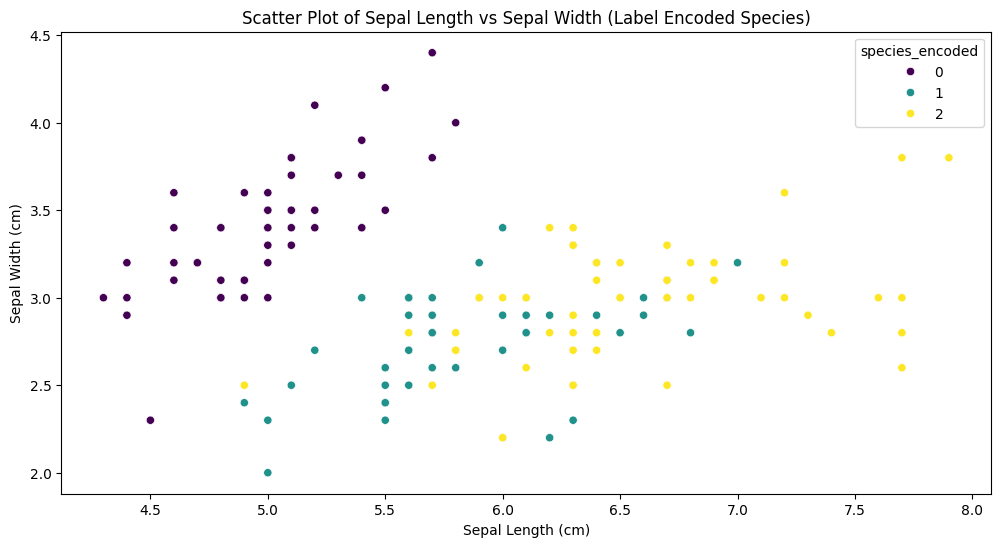

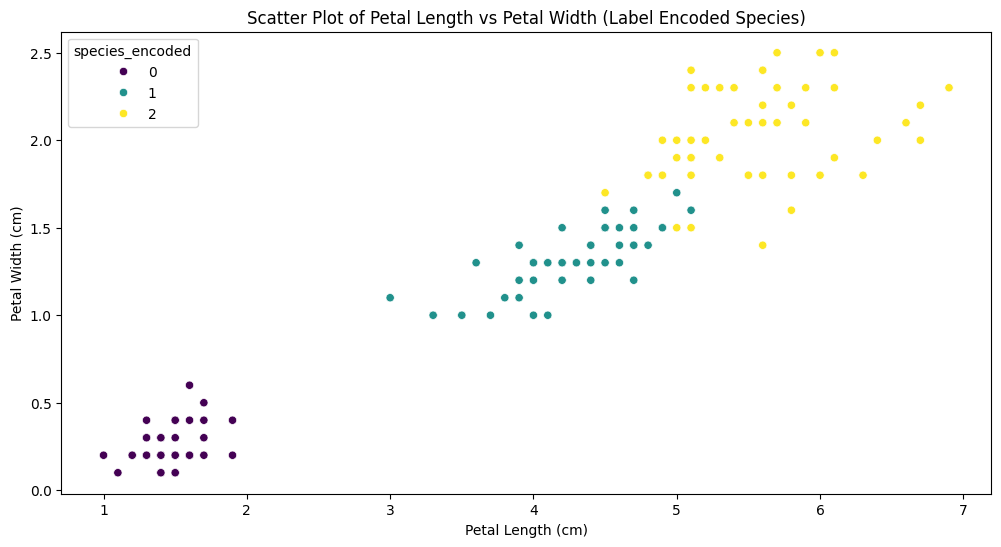

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot for Label Encoding
plt.figure(figsize=(12, 6))
sns.scatterplot(x='sepal length (cm)', y='sepal width (cm)', hue='species_encoded', data=df, palette='viridis')
plt.title('Scatter Plot of Sepal Length vs Sepal Width (Label Encoded Species)')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.show()

plt.figure(figsize=(12, 6))
sns.scatterplot(x='petal length (cm)', y='petal width (cm)', hue='species_encoded', data=df, palette='viridis')
plt.title('Scatter Plot of Petal Length vs Petal Width (Label Encoded Species)')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.show()

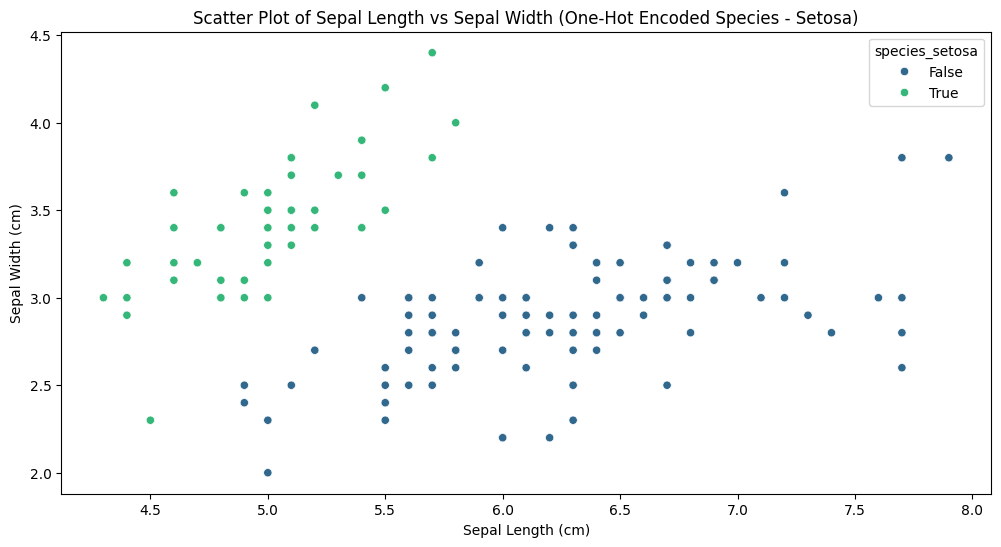

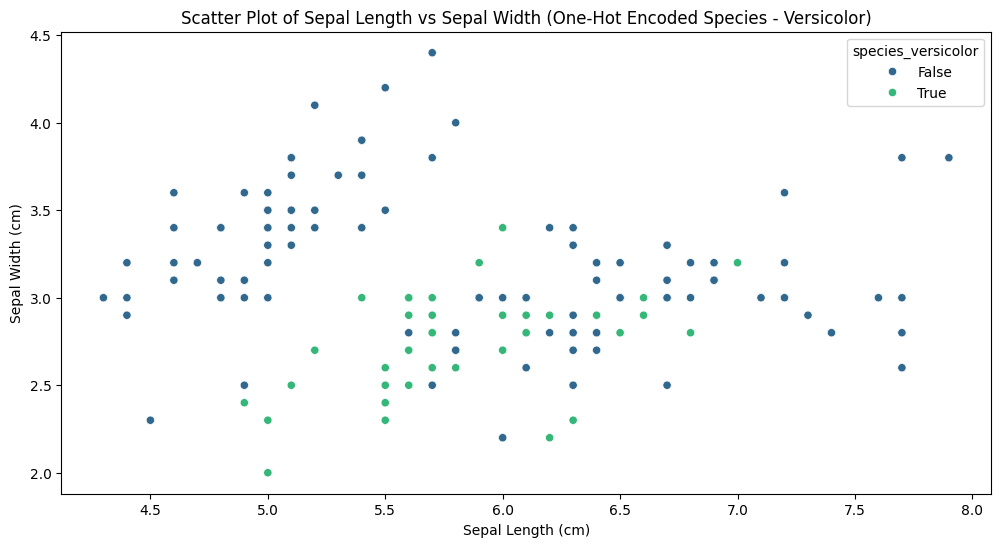

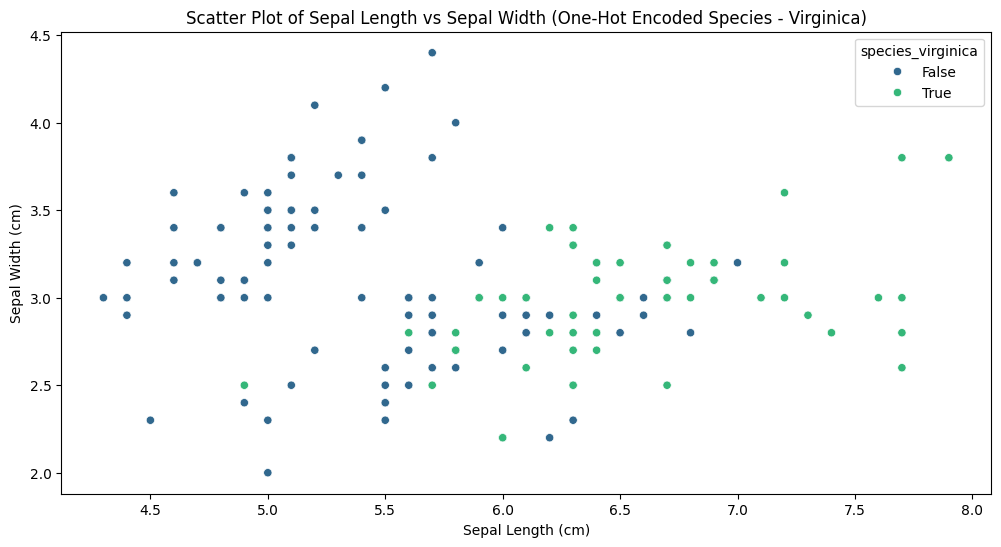

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plots for One-Hot Encoding
# We can plot each one-hot encoded column against numerical features,
# but this might not be as informative as using hue with the original or label encoded species.
# However, we can still use hue with the original species column (which is now used to create the one-hot columns)
# to visualize the separation based on the one-hot encoding.

plt.figure(figsize=(12, 6))
sns.scatterplot(x='sepal length (cm)', y='sepal width (cm)', hue='species_setosa', data=df, palette='viridis')
plt.title('Scatter Plot of Sepal Length vs Sepal Width (One-Hot Encoded Species - Setosa)')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.show()

plt.figure(figsize=(12, 6))
sns.scatterplot(x='sepal length (cm)', y='sepal width (cm)', hue='species_versicolor', data=df, palette='viridis')
plt.title('Scatter Plot of Sepal Length vs Sepal Width (One-Hot Encoded Species - Versicolor)')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.show()

plt.figure(figsize=(12, 6))
sns.scatterplot(x='sepal length (cm)', y='sepal width (cm)', hue='species_virginica', data=df, palette='viridis')
plt.title('Scatter Plot of Sepal Length vs Sepal Width (One-Hot Encoded Species - Virginica)')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.show()

# You can repeat this for other feature combinations